In [1]:
# DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
# helpers
%matplotlib inline

In [4]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [5]:
# Grahpviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [6]:
from sklearn.tree import plot_tree

# Import data

In [7]:
!cd
!dir

C:\Users\Alma Mtz\Documents
 Volume in drive C is OS
 Volume Serial Number is FC64-A520

 Directory of C:\Users\Alma Mtz\Documents

08/29/2021  06:45 PM    <DIR>          .
08/29/2021  06:45 PM    <DIR>          ..
08/21/2021  09:39 PM    <DIR>          .ipynb_checkpoints
08/08/2021  11:23 AM           146,573 AMC1T1.ipynb
08/29/2021  06:45 PM            28,813 AMC1T2.ipynb
07/25/2021  12:30 AM             9,345 C1T1.ipynb
08/10/2021  01:03 AM           468,459 C1T2-Copy1.ipynb
08/14/2021  11:42 AM             3,906 C1T2.ipynb
07/25/2021  12:04 AM         1,348,525 Demographic_Data.csv
               6 File(s)      2,005,621 bytes
               3 Dir(s)  423,298,539,520 bytes free


In [8]:
data = pd.read_csv("Demographic_Data.csv")
print(data.shape)

(80000, 5)


# Evaluate Data

In [9]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [11]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


# Preprocess

### Duplicates

In [12]:
data.duplicated().any()

True

In [13]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(21, 5)


,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [14]:
data = data.drop_duplicates()
data.duplicated().any()

False

### Null values

In [15]:
data.isnull().any()
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

### Discretize
* Discretize amount and age

In [16]:
df= pd.read_csv("Demographic_Data.csv")
pd.cut(df['amount'], bins = 4)

0             (2.01, 753.754]
1             (2.01, 753.754]
2        (1502.502, 2251.251]
3             (2.01, 753.754]
4        (1502.502, 2251.251]
                 ...         
79995         (2.01, 753.754]
79996    (1502.502, 2251.251]
79997         (2.01, 753.754]
79998         (2.01, 753.754]
79999         (2.01, 753.754]
Name: amount, Length: 80000, dtype: category
Categories (4, interval[float64, right]): [(2.01, 753.754] < (753.754, 1502.502] < (1502.502, 2251.251] < (2251.251, 3000.0]]

In [17]:
pd.cut(df ['amount'], bins = 4). value_counts()

(2.01, 753.754]         46599
(753.754, 1502.502]     18046
(1502.502, 2251.251]    10321
(2251.251, 3000.0]       5034
Name: amount, dtype: int64

In [18]:
amtBin = ['$0-700', '$701-1400', '$1401-2100', '$2101-3000']
cut_bins = [2, 700, 1503, 2252, 3000]
df ['amtBin'] = pd.cut(df ['amount'], bins = cut_bins, labels = amtBin)
df.head()

,in-store,age,items,amount,region,amtBin
0,0,37,4,281.03,2,$0-700
1,0,35,2,219.51,2,$0-700
2,1,45,3,1525.70,4,$1401-2100
3,1,46,3,715.25,3,$701-1400
4,1,33,4,1937.50,1,$1401-2100


In [19]:
pd.cut(df['age'], bins = 4)
pd.cut(df ['age'], bins = 4). value_counts()

(34.75, 51.5]      29723
(17.933, 34.75]    22454
(51.5, 68.25]      19848
(68.25, 85.0]       7975
Name: age, dtype: int64

In [20]:
ageBin = ['0-18', '19-37', '38-56', '57-75', '75-93']
cut_bins = [0, 17, 34, 51, 68, 85]
df ['ageBin'] = pd.cut(df ['age'], bins = cut_bins, labels = ageBin)
df.head()

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.03,2,$0-700,38-56
1,0,35,2,219.51,2,$0-700,38-56
2,1,45,3,1525.70,4,$1401-2100,38-56
3,1,46,3,715.25,3,$701-1400,38-56
4,1,33,4,1937.50,1,$1401-2100,19-37


# Analyze Data

### Statistical Analysis

In [21]:
# output statistics
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


### Visualizations

In [22]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


#### Histogram

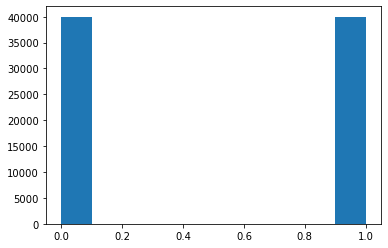

In [23]:
plt.hist(data['in-store'])
plt.show()

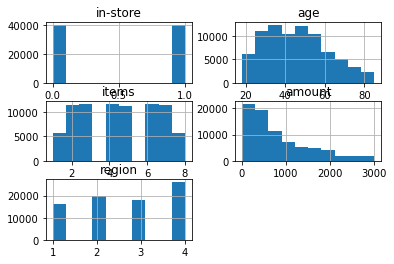

In [24]:
data.hist()
plt.show()

#### Scatter

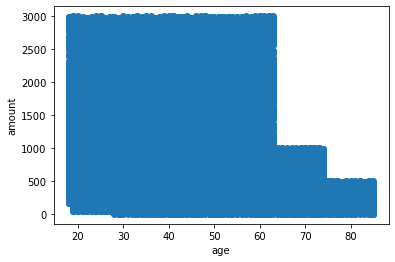

In [25]:
# Scatter plot example
data_sample = data
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
# assignment: add axis titles
plt.ylabel('amount')
plt.xlabel('age')
plt.show()

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


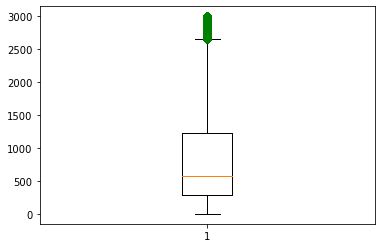

In [26]:
# Box plot example
# eval col names/features
header = data.dtypes.index
print(header)
# plot
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

#### Stacked Col

* 1a) Do customers in different regions spend more per transaction (number of obs per spend category)?
* 1b) Which regions spend the most/least (overall - just from looking at the chart)?

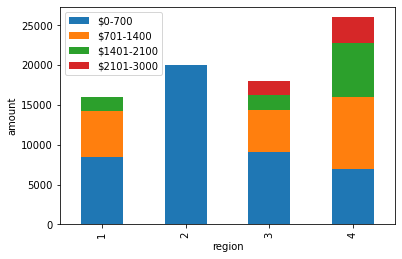

In [27]:
np.random.seed(1)
df.groupby('region')['amtBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
plt.ylabel('amount')
plt.xlabel('region')
plt.show()

#### Other visualizations from Titanic tutorial

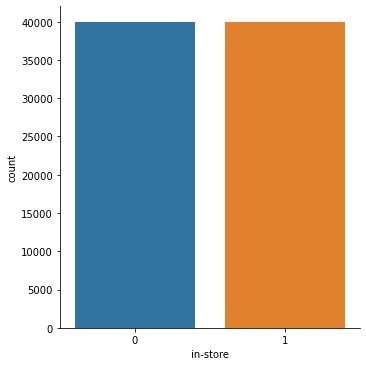

In [28]:
# in-store purchases
demographic_df=pd.read_csv("Demographic_Data.csv")
sns.catplot(x='in-store', data=demographic_df, kind='count', aspect=1.0)

In [29]:
# in-store purchase per region
demographic_df.groupby(['in-store', 'region'])['in-store'].count()

in-store  region
0         2         20000
          3          7001
          4         12999
1         1         16000
          3         10999
          4         13001
Name: in-store, dtype: int64

In [30]:
# in-store mean of purchase per region
df.groupby(['region']).mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.703938,4.510063,745.161491
2,0.000000,56.610350,4.512750,252.109196
3,0.611056,45.646944,4.494000,917.969637
4,0.500038,38.750731,4.503462,1284.052012


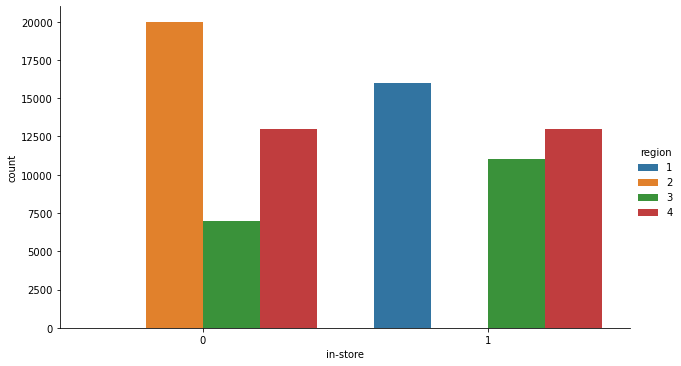

In [31]:
# in-store purchases per region
g = sns.catplot(x='in-store', data=demographic_df, hue='region', kind='count', aspect=1.75)
g.set_xlabels('in-store')

In [32]:
demographic_df.pivot_table('age', 'items', 'region', aggfunc=np.mean, margins=True)

region,1,2,3,4,All
items,,,,,
1,43.303797,56.934858,46.388889,38.885307,45.969479
2,43.448245,56.521032,45.714286,38.766039,45.721878
3,44.059560,56.023563,45.382070,38.885146,45.577871
4,43.686192,56.548064,45.312897,38.725474,45.712401
5,43.815707,56.963954,45.360923,38.705052,45.765083
6,43.456743,57.196750,45.728429,38.917221,45.921107
7,43.993122,56.293430,46.008567,38.576572,45.818773
8,43.645570,56.500697,45.692427,38.465600,45.610055
All,43.703938,56.610350,45.646944,38.750731,45.757925


# Feature Selection
For this task, you will not be selecting features. Instead, focus on answering the following question (pay particular attention to correlation analysis):

* 2) Is there a relationship between the number of items purchased and amount spent?
* 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store?

### Correlation

In [33]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


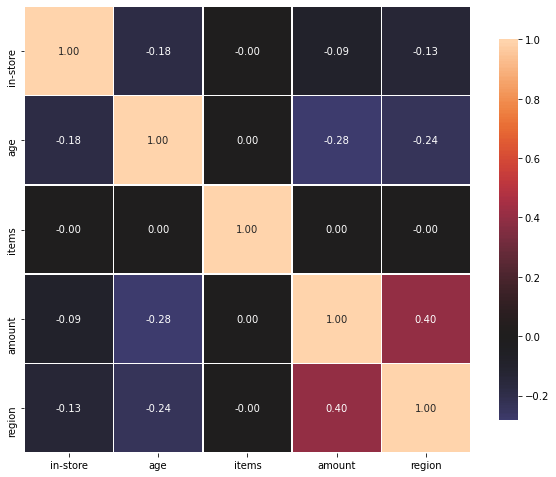

In [34]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Covariance

In [35]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


# Train/Test Sets

* The modeling (predicitive analytics) process begins with splitting data in to train and test sets.
* Focus on buiding models to answer the following questions:
* 3a) Are there differences in the age of customers between regions?
* 3b) If so, can we predict the age of a customer in a region based on other demographic data? (Decision tree.)
* 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store? (In addition to correlation analysis, a decision tree can also provide insight.)
* 4b) Do any other factors predict if a customer will buy online or in our stores? (Decison tree.)

### 3a) Are there differences in the age of customers between regions?

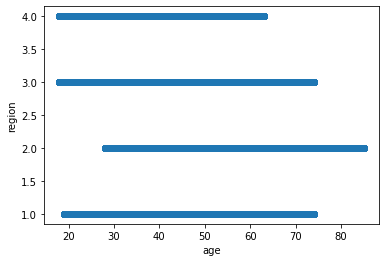

In [36]:
# Scatter plot example
data_sample = data
x = data_sample['age']
y = data_sample['region']
plt.scatter(x,y, marker='o')
# assignment: add axis titles
plt.ylabel('region')
plt.xlabel('age')
plt.show()

In [37]:
df.groupby(['region']).mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.703938,4.510063,745.161491
2,0.000000,56.610350,4.512750,252.109196
3,0.611056,45.646944,4.494000,917.969637
4,0.500038,38.750731,4.503462,1284.052012


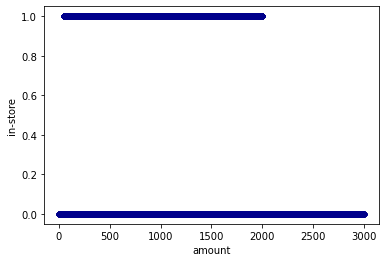

In [87]:
demographic_df=pd.read_csv("Demographic_Data.csv")
columns=['region', 'in-store', 'age', 'items', 'amount']
ax1 = df.plot.scatter(x='amount',
                      y='in-store',
                      c='DarkBlue')

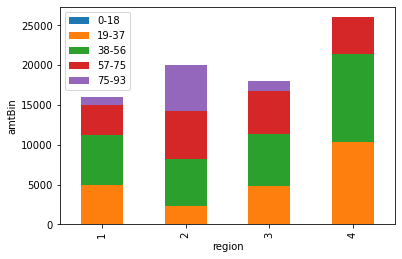

In [38]:
np.random.seed(1)
df.groupby('region')['ageBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
plt.ylabel('amtBin')
plt.xlabel('region')
plt.show()

In [99]:
demographic_df.pivot_table('age', 'region', aggfunc=np.mean, margins=True)

,age
region,
1,43.703938
2,56.610350
3,45.646944
4,38.750731
All,45.757925


In [40]:
demographic_df.pivot_table('age', 'items', aggfunc=np.mean, margins=True)

,age
items,
1,45.969479
2,45.721878
3,45.577871
4,45.712401
5,45.765083
6,45.921107
7,45.818773
8,45.610055
All,45.757925


### Set random seed

In [41]:
seed = 123

### Split datasets into X (IVs) and y (DV)

* For each ds, split into X, y
* oob (out-of-box; no feature selection or feature engineering)

In [42]:
data.rename(columns={"in-store":"type"}, inplace = True)

In [43]:
# pring column names for quick reference
data.columns

Index(['type', 'age', 'items', 'amount', 'region'], dtype='object')

In [44]:
ageBin = ['0-18', '19-37', '38-56', '57-75', '75-93']
cut_bins = [0, 17, 34, 51, 68, 85]
df ['ageBin'] = pd.cut(df ['age'], bins = cut_bins, labels = ageBin)
amtBin = ['$0-700', '$701-1400', '$1401-2100', '$2101-3000']
cut_bins = [2, 700, 1503, 2252, 3000]
df ['amtBin'] = pd.cut(df ['amount'], bins = cut_bins, labels = amtBin)
inplace=True
df.head()

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.03,2,$0-700,38-56
1,0,35,2,219.51,2,$0-700,38-56
2,1,45,3,1525.70,4,$1401-2100,38-56
3,1,46,3,715.25,3,$701-1400,38-56
4,1,33,4,1937.50,1,$1401-2100,19-37


In [45]:
data["ageBin"] = data["age"]
data["ageBin"].replace({"0-18":1,"19-37":2,"38-56":3,"57-75":4,"75-93":5}, inplace =True)


data["amtBin"] = data["amount"]
data["amtBin"].replace({"$0-700":1,"$701-1400":2,"$1401-2100":3,"$2101-3000":4}, inplace = True)
data

,type,age,items,amount,region,ageBin,amtBin
0,0,37,4,281.03,2,37,281.03
1,0,35,2,219.51,2,35,219.51
2,1,45,3,1525.70,4,45,1525.70
3,1,46,3,715.25,3,46,715.25
4,1,33,4,1937.50,1,33,1937.50
...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,71,558.82
79996,0,59,7,1932.00,3,59,1932.00
79997,0,54,1,414.16,2,54,414.16
79998,1,49,4,335.32,1,49,335.32


In [46]:
# For question 3b): set region as dv


Y_oobQ3 = data['region']
# select IVs/features
X_oobQ3 = data[['type','ageBin','items','amtBin']]
# select Age/Amt binned features
X_oobQ3ageAmt = data[['type','ageBin','items','amtBin']]
x.head()

0    37
1    35
2    45
3    46
4    33
Name: age, dtype: int64

In [47]:
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [48]:
## For questions Q4a/Q4b): set in-store as dv 
Y_oobQ4 = data['type']
X_oobQ4 = data[['region','ageBin','items','amtBin']]
# select Age/Amt binned features
X_oobQ4ageAmt = data[['region','ageBin','items','amtBin']]
x.head()

0    37
1    35
2    45
3    46
4    33
Name: age, dtype: int64

In [49]:
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [50]:
#Q4b
Y_oobQ4B = data['type']
X_oobQ4B = data[['region','ageBin','items','amtBin']]

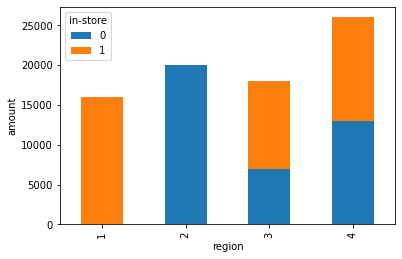

In [111]:
np.random.seed(1)
df.groupby('region')['in-store']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
plt.ylabel('amount')
plt.xlabel('region')
plt.show()

### Create train and test sets

In [51]:
# Q3b) region as dv; un-binned data

X_trainQ3, X_testQ3, Y_trainQ3, Y_testQ3 = train_test_split(X_oobQ3, 
                                            Y_oobQ3, 
                                            test_size = .30, 
                                            random_state = seed)

print(X_trainQ3.shape, X_testQ3.shape)
print(Y_trainQ3.shape, Y_testQ3.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


In [52]:
# Q4a) in-store as dv

X_trainQ4, X_testQ4, Y_trainQ4, Y_testQ4 = train_test_split(X_oobQ4, 
                                            Y_oobQ4, 
                                            test_size = .30, 
                                            random_state = seed)

print(X_trainQ4.shape, X_testQ4.shape)
print(Y_trainQ4.shape, Y_testQ4.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


In [53]:
#Q4b
Y_oobQ4B = data['type']
X_oobQ4B = data[['region','age','items','amount']]
# Q4b) in-store as dv; age binned & amount binned

X_trainQ4B, X_testQ4B, Y_trainQ4B, Y_testQ4B = train_test_split(X_oobQ4B, 
                                            Y_oobQ4B, 
                                            test_size = .30, 
                                            random_state = seed)

print(X_trainQ4B.shape, X_testQ4B.shape)
print(Y_trainQ4B.shape, Y_testQ4B.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


# Modeling

#### Two purposes of modeling:

* 1) Evaluate patterns in data
* 2) Make predictions

## Evaluate patterns in data using a Decision Tree (DT)

### dv = region

In [54]:
# use the dataset that has region as the dv

# run code to fit and predict the DecisionTreeClassifier


# select DT model for classification
dt = DecisionTreeClassifier(max_depth=3)

# train/fit the mode using region as dv, and binned by age & amt
dtModel3 = dt.fit(X_trainQ3, Y_trainQ3)

# make predicitons with the trained/fit model
dtPred3 = dtModel3.predict(X_testQ3)

# performance metrics
print(accuracy_score(Y_testQ3, dtPred3))
print(classification_report(Y_testQ3, dtPred3))

0.6351171126114862
              precision    recall  f1-score   support

           1       0.41      0.68      0.51      4838
           2       0.90      1.00      0.95      5979
           3       0.54      0.11      0.18      5391
           4       0.65      0.70      0.67      7786

    accuracy                           0.64     23994
   macro avg       0.63      0.62      0.58     23994
weighted avg       0.64      0.64      0.60     23994



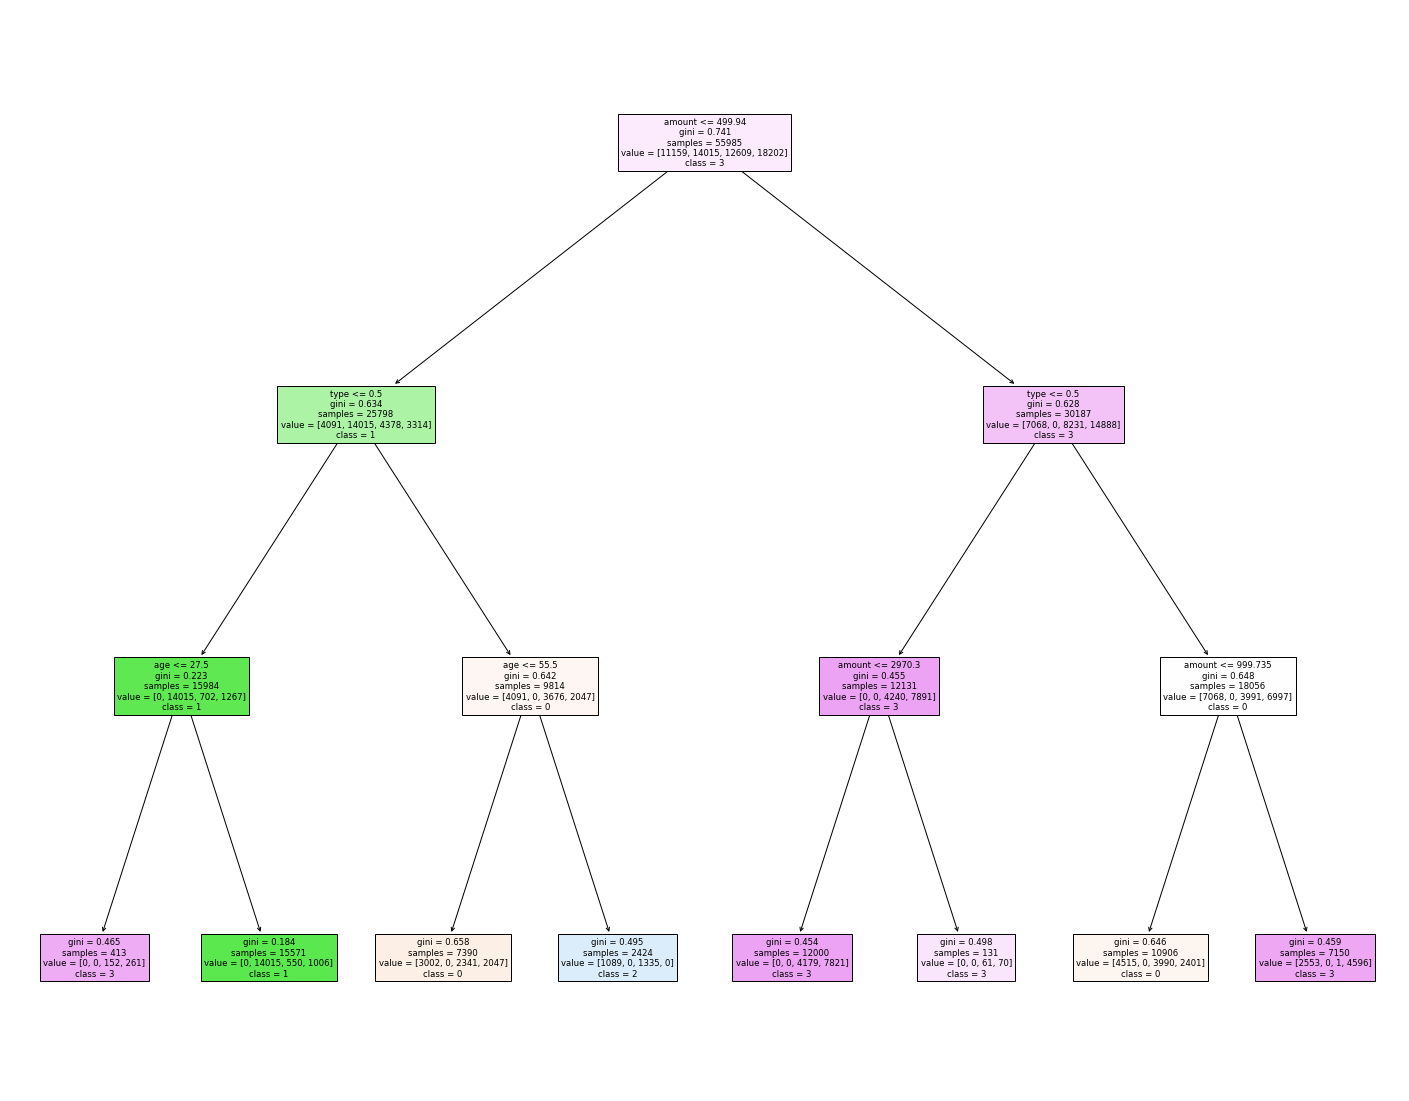

In [56]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtModel3, feature_names=data.columns,class_names=['0', '1', '2', '3'], filled=True)

In [ ]:
# 3b) Is age in the DT? If so, what decision rules incorporate age? 

# Other questions: From the above DT, is the 'items' feature in the tree? 
# What does it mean if it is, or is not, in the tree?

### dv = in-store

In [89]:
# run DT model

# code goes here

In [90]:
# select DT model for classification
dt = DecisionTreeClassifier(max_depth=3)

# train/fit the mode using region as dv, and binned by age & amt
dtModel4 = dt.fit(X_trainQ4, Y_trainQ4)

# make predicitons with the trained/fit model
dtPred4 = dtModel4.predict(X_testQ4)

# performance metrics
print(accuracy_score(Y_testQ4, dtPred4))
print(classification_report(Y_testQ4, dtPred4))

0.8380428440443444
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     11874
           1       0.76      1.00      0.86     12120

    accuracy                           0.84     23994
   macro avg       0.88      0.84      0.83     23994
weighted avg       0.88      0.84      0.83     23994



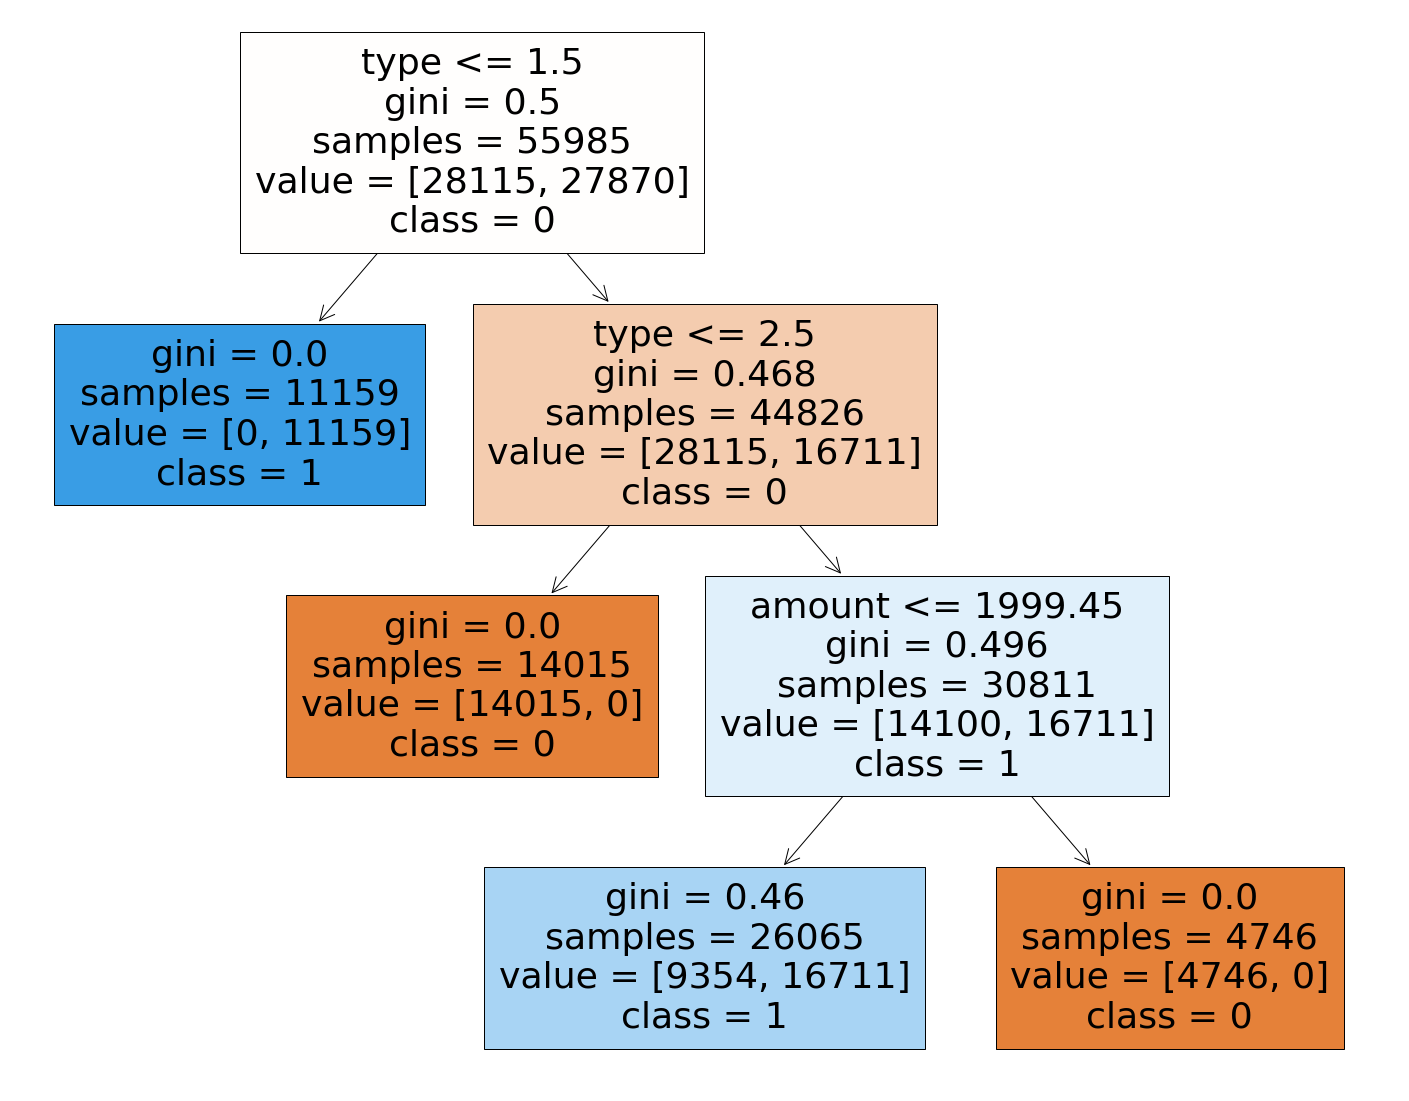

In [91]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtModel4, feature_names=data.columns,class_names=['0', '1'], filled=True)

In [ ]:
# 4b) Do any factors predict if a customer will buy online or
# in our stores?

# Make Predictions

* Focus on the following question: Can a model be developed that can accurately classify where a transaction took place (in-store/online)?

### Select models

In [117]:
# create empty list and then populate it with the following models

models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# create empty lists to hold results and model names
results = []
names = []

In [115]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [116]:
from sklearn import ensemble
rf_clf= ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_trainQ4, Y_trainQ4)
rf_clf.score(X_testQ4, Y_testQ4)

0.8614236892556473

In [118]:
gb_clf= ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(X_trainQ4, Y_trainQ4)
gb_clf.score(X_testQ4, Y_testQ4)

0.88367925314662

### CV (cross-validation)

In [119]:
# Set in-store as dv; unbinned data

Y_oobQ4 = data['type']
# select IVs/features
X_oobQ4 = data[['region','age','items','amount']]
for name, model in models:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model,
                             X_trainQ4,
                             Y_trainQ4,   
                             cv=kfold,
                             scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())
    #print(msg)

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

DT 0.8456015551806836
RF 0.862445321688924
GB 0.8862910539963224


In [120]:
# Same as above, but using binned data for age and amount
Y_oobQ4 = data['type']
# select Age/Amt binned features
X_oobQ4ageAmt = data[['region','ageBin','items','amtBin']]
for name, model in models:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model,
                             X_trainQ4,
                             Y_trainQ4,   
                             cv=kfold,
                             scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())
    #print(msg)

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

DT 0.8456015551806836
RF 0.862445321688924
GB 0.8862910539963224
DT 0.8459766719260253
RF 0.8628025710830319
GB 0.8862910539963224


In [ ]:
# Based all of the above model runs, which is the most accurate?
# Is the accuracy of the top model higher than 75%?

In [ ]:
?cross_val_score